<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

Tue Feb 25 14:38:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.36                 Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   52C    P0             27W /  109W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.5.1


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
import torch
from torch import nn

import torchvision
from torchvision import transforms
from torchvision import  datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
train_data = datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [7]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [8]:
train_data[0][0].shape


torch.Size([1, 28, 28])

In [9]:
class_names = train_data.classes

## 6. Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([28, 28])


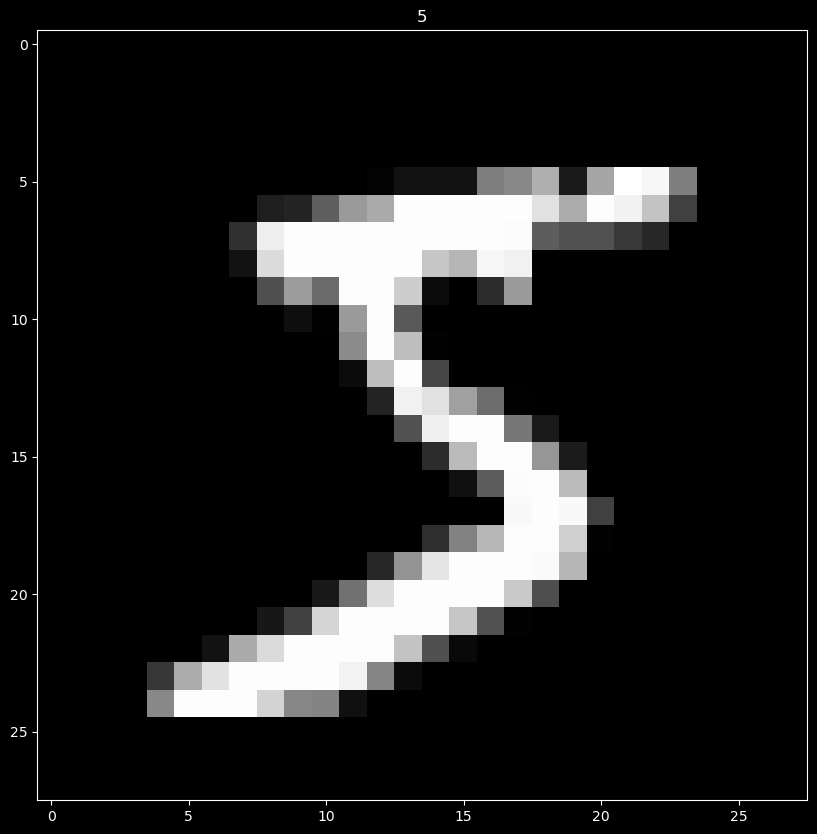

torch.Size([28, 28])


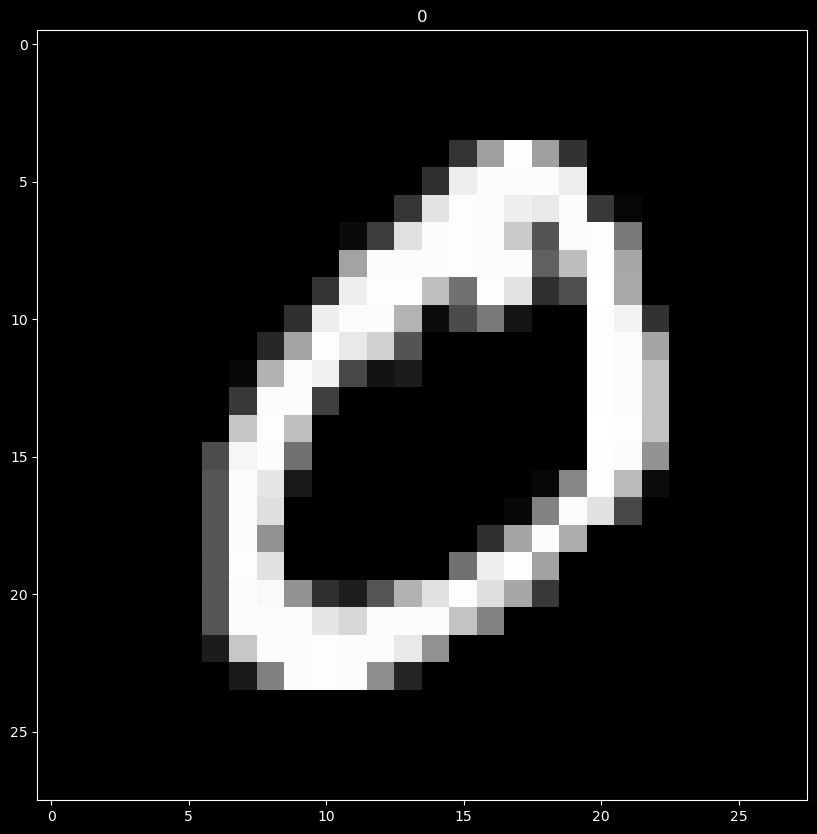

torch.Size([28, 28])


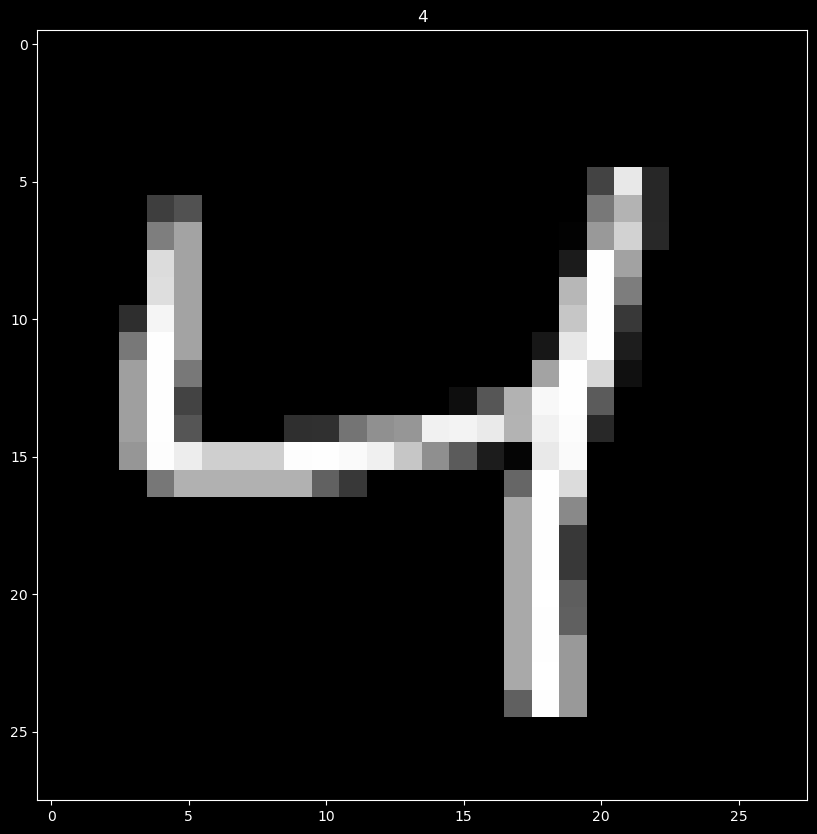

torch.Size([28, 28])


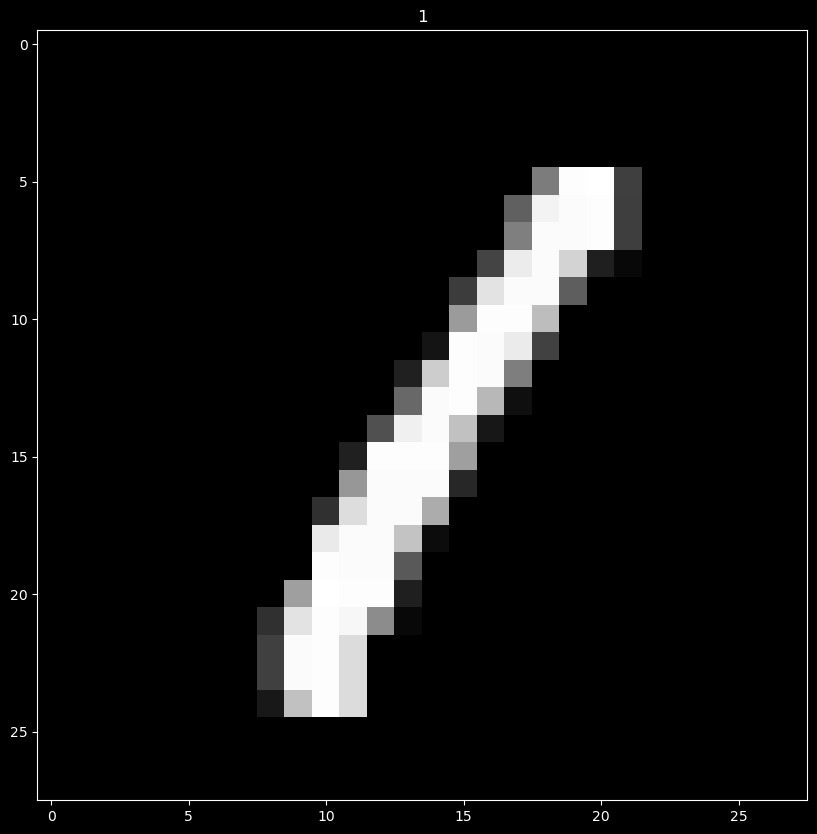

torch.Size([28, 28])


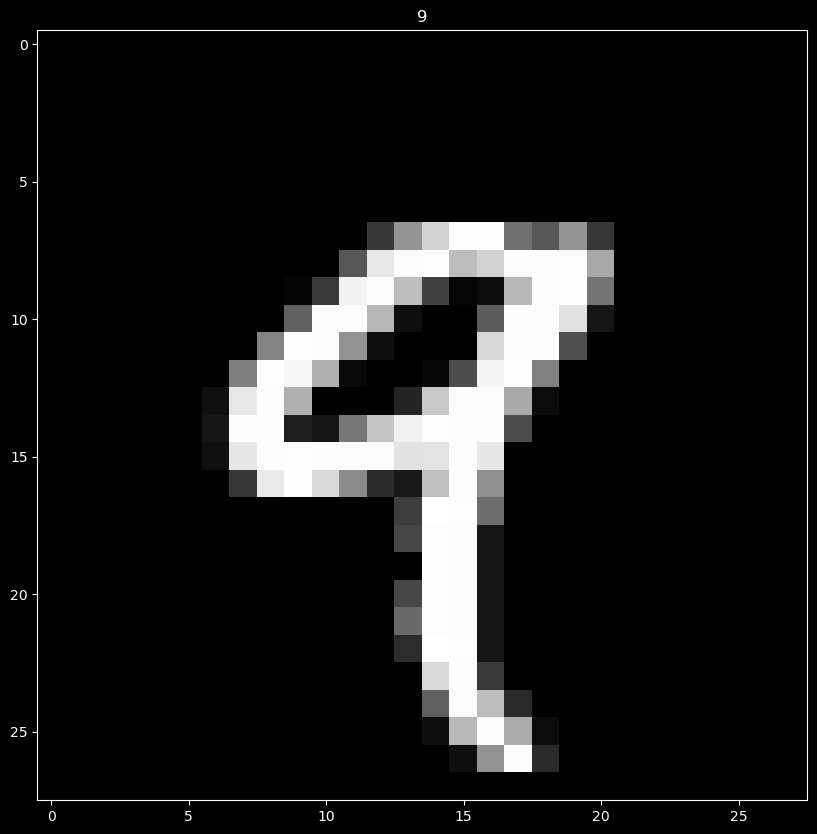

In [10]:
for i in range(5) :
    image = train_data[i][0]
    image_squeeze = image.squeeze()
    print(image_squeeze.shape)
    label = train_data[i][1]

    plt.figure(figsize=(10,10))
    plt.imshow(image_squeeze, cmap="gray")
    plt.title(label)
    plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [11]:
from torch.utils.data import DataLoader

In [12]:
train_dataloader = torch.utils.data.DataLoader(
    train_data, 
    batch_size=32, 
    shuffle=True)

test_dataloader = DataLoader(
    test_data, 
    batch_size=32, 
    shuffle=False)

In [13]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [14]:
from torch import nn

class MNIST_model(nn.Module):

    def __init__(
            self,
            input_shape: int,
            hidden_units: int,
            output_shape: int
    ):
        super().__init__()

        self.conv_block1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classfier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=hidden_units*7*7,
                out_features=output_shape
            )
        )
    
    def forward(self, x):
        x = self.conv_block1(x)
        # print(x.shape)
        x = self.conv_block2(x)
        # print(x.shape)
        x = self.classfier(x)
        # print(x.shape)
        return x

In [15]:
model = MNIST_model(
    input_shape=1,
    hidden_units=10,
    output_shape=10
).to(device)

model

MNIST_model(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classfier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [16]:
dummy_x = torch.rand(size=(1,28,28)).unsqueeze(dim=0).to(device)
dummy_x.shape

torch.Size([1, 1, 28, 28])

In [17]:
model(dummy_x)

tensor([[-0.0352, -0.0158, -0.0234,  0.0433,  0.0119,  0.0104, -0.0170, -0.0119,
          0.0129, -0.0656]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [18]:
%%time

from tqdm.auto import tqdm

model_cpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to('cpu')

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(),
                            lr=0.01)

epochs = 5

for epoch in tqdm(range(epochs)):

    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):

        model_cpu.train()

        y_pred = model_cpu(X)

        loss = loss_fn(y_pred, y)
        train_loss = train_loss + loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    train_loss = train_loss / len(train_dataloader)

    test_loss = 0

    model_cpu.eval()

    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):

            y_test_pred = model_cpu(X)
            loss = loss_fn(y_test_pred, y)
            test_loss = test_loss + loss
        
        test_loss = test_loss / len(test_dataloader)

    print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss:.3f}")
     

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 1.904 | Test loss: 0.450
Epoch: 1 | Loss: 0.249 | Test loss: 0.124
Epoch: 2 | Loss: 0.123 | Test loss: 0.088
Epoch: 3 | Loss: 0.093 | Test loss: 0.074
Epoch: 4 | Loss: 0.078 | Test loss: 0.062
CPU times: total: 9min 1s
Wall time: 1min 36s


In [20]:
%%time

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model_gpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(),
                            lr=0.01)

epochs = 5

for epoch in tqdm(range(epochs)):

    train_loss = 0
    for X, y in train_dataloader:
        model_gpu.train()

        X, y = X.to(device), y.to(device)
        y_pred = model_gpu(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_dataloader)

    test_loss_total = 0
  # Put model in eval mode and turn on inference mode
    model_gpu.eval()
    with torch.inference_mode():
        for batch, (X_test, y_test) in enumerate(test_dataloader):
            # Make sure test data on target device
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            test_pred = model_gpu(X_test)
            test_loss = loss_fn(test_pred, y_test)

            test_loss_total += test_loss

            # Adjust test loss total for number of batches
            test_loss_total /= len(test_dataloader)

    # Print out what's happening
    print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 1.228 | Test loss: 0.000
Epoch: 1 | Loss: 0.163 | Test loss: 0.000
Epoch: 2 | Loss: 0.100 | Test loss: 0.000
Epoch: 3 | Loss: 0.080 | Test loss: 0.000
Epoch: 4 | Loss: 0.069 | Test loss: 0.000
CPU times: total: 17.6 s
Wall time: 1min 3s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [21]:
model_pred_logits = model_gpu(test_data[0][0].unsqueeze(dim=0).to(device))
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_label = torch.argmax(model_pred_probs, dim=1)
model_pred_label

tensor([7], device='cuda:0')

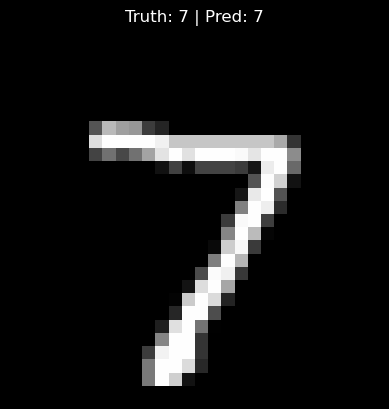

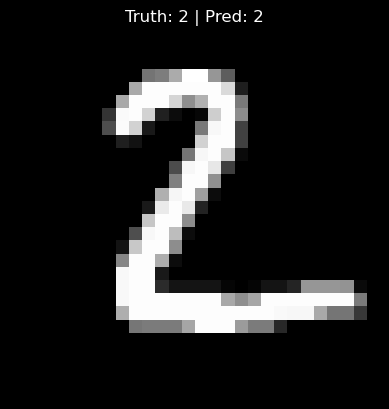

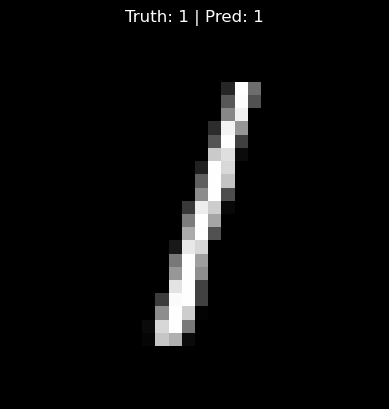

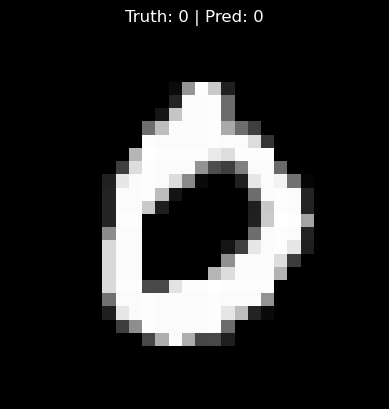

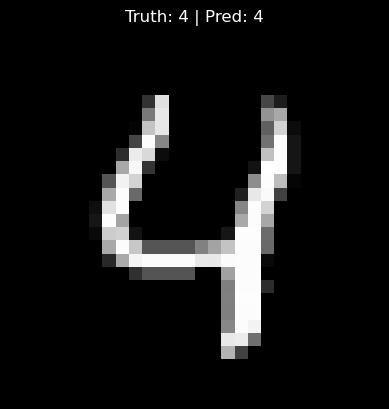

In [22]:
num_to_plot = 5 
for i in range(num_to_plot):
    # Get image and labels from the test data
    img = test_data[i][0]
    label = test_data[i][1]

    # Make prediction on image
    model_pred_logits = model_gpu(img.unsqueeze(dim=0).to(device))
    model_pred_probs = torch.softmax(model_pred_logits, dim=1)
    model_pred_label = torch.argmax(model_pred_probs, dim=1)

    # Plot the image and prediction
    plt.figure()
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}") 
    plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [23]:
import torchmetrics, mlxtend

In [24]:
model_gpu.eval()

y_pred = []
with torch.inference_mode():

    for X,y in test_dataloader:
        X, y = X.to(device), y.to(device)
        y_pred_logits = model_gpu(X)

        y_pred_label = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
        y_pred.append(y_pred_label)
    
    y_pred = torch.cat(y_pred).cpu()



In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Ensure class_names is defined
class_names = [str(i) for i in range(10)]

confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred,
                         target=test_data.targets)

fix, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

ModuleNotFoundError: No module named 'numpy.strings'

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [27]:
from torchvision import datasets, transforms

train_data = datasets.FashionMNIST(root='data',
                                   train=True,
                                   transform=transforms.ToTensor(),
                                   download=True)

test_data = datasets.FashionMNIST(root='data',
                                  train=False,
                                  transform=transforms.ToTensor(),
                                  download=True)

In [28]:
fashion_mnist_class_names = train_data.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [29]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

len(train_dataloader), len(test_dataloader)

(1875, 313)

In [30]:
model_fashion_mnist = MNIST_model(input_shape=1,
                                  hidden_units=10,
                                  output_shape=10).to(device)

model_fashion_mnist

MNIST_model(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classfier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [31]:
import torch
from torch import nn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_fashion_mnist.parameters(),
                            lr=0.01)

In [33]:
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc = Accuracy(task='multiclass', num_classes=len(fashion_mnist_class_names)).to(device)

epochs = 5

for epoch in tqdm(range(epochs)):
    train_loss, test_loss = 0, 0
    train_acc, test_acc = 0, 0

    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)

        model_fashion_mnist.train()
        y_pred = model_fashion_mnist(X)

        loss = loss_fn(y_pred, y)
        train_loss = train_loss + loss
        train_acc = train_acc + acc(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    train_loss = train_loss / len(train_dataloader)
    train_acc = train_acc / len(train_dataloader)

    model_fashion_mnist.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)

            y_pred = model_fashion_mnist(X)

            test_loss = test_loss + loss_fn(y_pred, y)
            test_acc = test_acc + acc(y_pred, y)

        test_loss = test_loss / len(test_dataloader)
        test_acc = test_acc / len(test_dataloader)
    
    print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss:.3f} | Test acc: {test_acc:.2f}")
    

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.096 | Train acc: 0.62 | Test loss: 0.608 | Test acc: 0.78
Epoch: 1 | Train loss: 0.524 | Train acc: 0.81 | Test loss: 0.593 | Test acc: 0.78
Epoch: 2 | Train loss: 0.450 | Train acc: 0.84 | Test loss: 0.461 | Test acc: 0.84
Epoch: 3 | Train loss: 0.409 | Train acc: 0.85 | Test loss: 0.416 | Test acc: 0.85
Epoch: 4 | Train loss: 0.382 | Train acc: 0.86 | Test loss: 0.422 | Test acc: 0.85


In [34]:
test_pred = []
model_fashion_mnist.eval()
with torch.inference_mode():

    for X, y in test_dataloader:
        y_pred_logits = model_fashion_mnist(X.to(device))
        y_pred_label = torch.argmax(torch.softmax(y_pred_logits, dim=1), dim=1)
        test_pred.append(y_pred_label)
    test_pred = torch.cat(test_pred).cpu()

In [35]:
import numpy as np

wrong_pred_indexes = np.where(test_pred != test_data.targets)[0]
len(wrong_pred_indexes)

1502

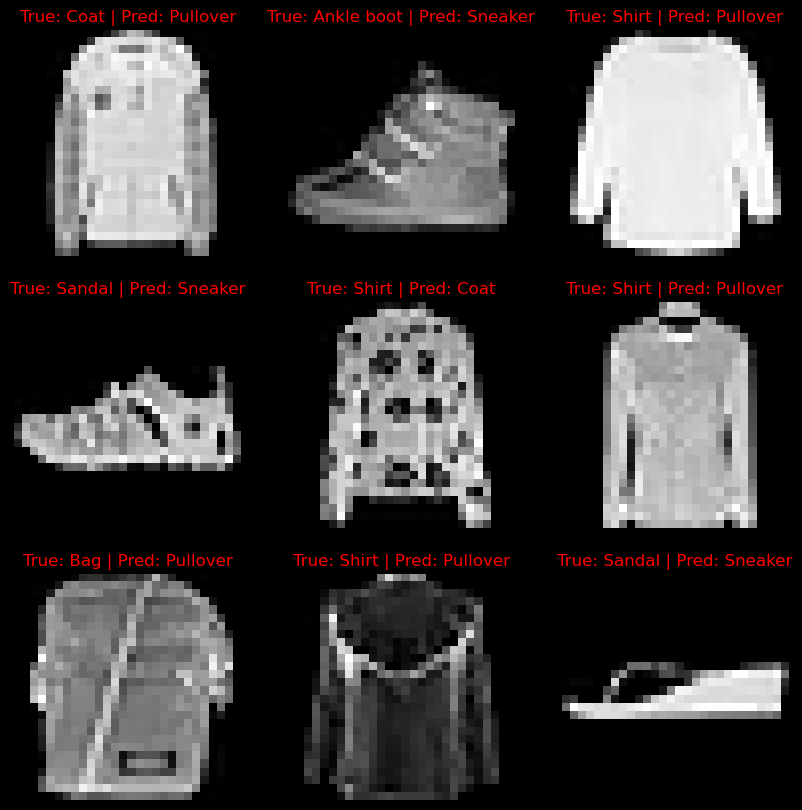

In [36]:
# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
    # Get true and pred labels
    true_label = fashion_mnist_class_names[test_data[idx][1]]
    pred_label = fashion_mnist_class_names[test_pred[idx]]

    # Plot the wrong prediction with its original label
    plt.subplot(3, 3, i+1)
    plt.imshow(test_data[idx][0].squeeze(), cmap="gray")
    plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
    plt.axis(False)